<a href="https://colab.research.google.com/github/tanmaychikhale/MachineLearning/blob/main/Practical_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve, precision_recall_curve, mean_absolute_error,
    mean_squared_error
)
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:

data = pd.read_csv("/content/customer_churn_dataset-testing-master.csv")

In [43]:

# Inspect the data
print(data.head())
print(data.info())

   CustomerID  Age  Gender  Tenure  ...  Contract Length  Total Spend  Last Interaction Churn
0           1   22  Female      25  ...          Monthly          598                 9     1
1           2   41  Female      28  ...          Monthly          584                20     0
2           3   47    Male      27  ...           Annual          757                21     0
3           4   35    Male       9  ...        Quarterly          232                18     0
4           5   53  Female      58  ...           Annual          533                18     0

[5 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency  

In [44]:
# Preprocessing
# Handle missing values
numeric_cols = data.select_dtypes(include=["number"]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

categorical_cols = data.select_dtypes(include=["object"]).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

In [45]:
# Encode categorical variables
data = pd.get_dummies(data, columns=["Gender", "Subscription Type", "Contract Length"], drop_first=True)

In [46]:
# Drop irrelevant columns
X = data.drop(["Churn", "CustomerID"], axis=1)
y = data["Churn"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
# Train a classification model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


In [48]:
# Evaluation Metrics
# Classification Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.83
Precision: 0.82
Recall: 0.83
F1 Score: 0.82
ROC-AUC: 0.91


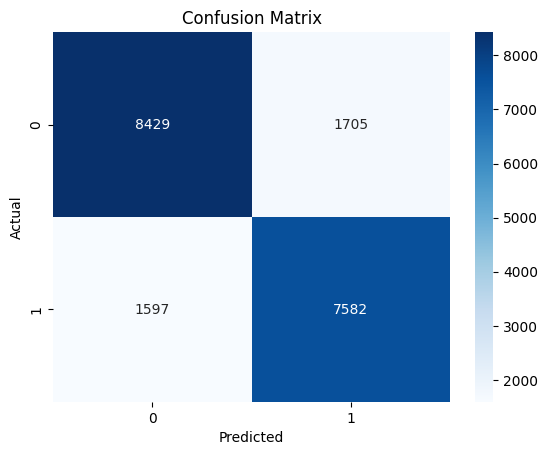

In [49]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

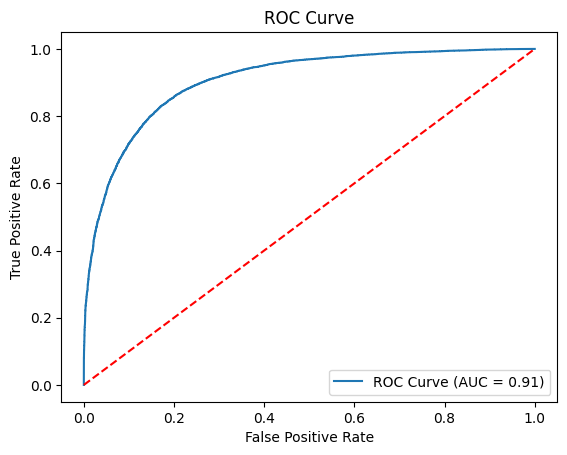

In [50]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="red")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

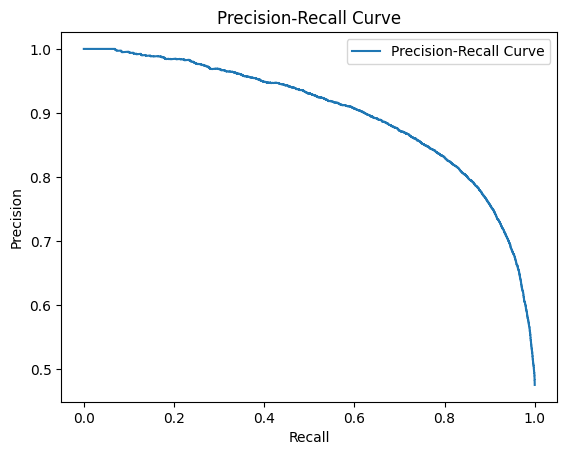

In [51]:
# Precision-Recall Curve
precisions, recalls, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label="Precision-Recall Curve")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [52]:
# Regression Evaluation (Example using probabilities as target)
# Simulating regression evaluation for churn probability prediction
regression_true = y_test  # Assuming probabilities
regression_pred = y_pred_proba

mae = mean_absolute_error(regression_true, regression_pred)
mse = mean_squared_error(regression_true, regression_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 0.25
Mean Squared Error (MSE): 0.12
Root Mean Squared Error (RMSE): 0.35


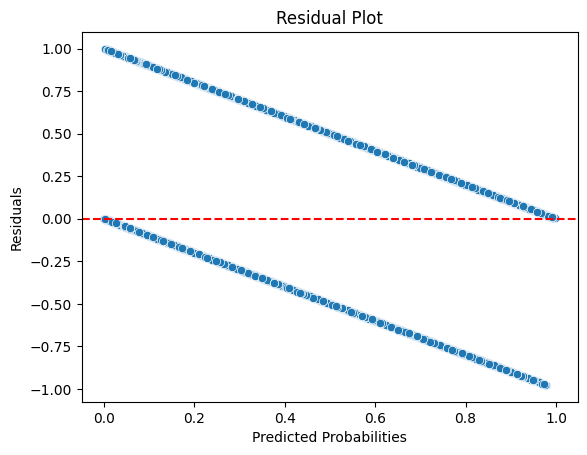

In [53]:
# Residual Plot
residuals = regression_true - regression_pred
sns.scatterplot(x=regression_pred, y=residuals)
plt.axhline(0, linestyle="--", color="red")
plt.title("Residual Plot")
plt.xlabel("Predicted Probabilities")
plt.ylabel("Residuals")
plt.show()